# Welcome to Jupyter!

In [1]:
pip install seaborn

     |████████████████████████████████| 292 kB 7.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=75f0453fd482faa9b7d871400d9f9fb7fa9662337461bbca32dfa827e2424d59
  Stored in directory: /home/jovyan/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#MY IMPLEMENTATION OF KMEANS

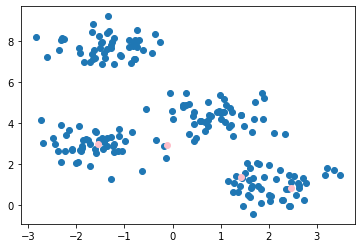

In [73]:
from sklearn.datasets._samples_generator import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd


class cluster:

    def __init__(self):
        pass

    def fit(self, X):
        pass


class kmeans(cluster):

    def __init__(self, k_in, iterations, balanced):
        self.k = k_in
        self.max_iterations = iterations
        self.balanced = balanced
        pass

    def __init__(self, k_in, iterations):
        self.k = k_in
        self.max_iterations = iterations
        self.balanced = False
        pass
    

    def fit(self, X):
        centroids = [X[np.random.randint(0, len(X))].tolist()]
        for i in range(self.k - 1):
            centroids.append(X[np.random.randint(0, len(X))].tolist())
            
        X_closest_centroid = [[-1, float('INF')]]
        for j in range(len(X)-1):
            X_closest_centroid.append([-1, float('INF')])

        iterator = 0
        while iterator < self.max_iterations:
            point_pos = 0
            for z in X:
                for s in range(len(centroids)):
                    distance = np.sqrt(abs((centroids[s][0] - z[0]) ** 2 - (centroids[s][1] - z[1]) ** 2))
                    if X_closest_centroid[point_pos][1] > distance:
                        X_closest_centroid[point_pos][1] = distance
                        X_closest_centroid[point_pos][0] = s

                point_pos += 1

            for s in range(len(centroids)):
                num, x, y = 0, 0, 0
                
                for z in range(len(X_closest_centroid)):
                    if(X_closest_centroid[z][0] == s):
                        x += X[z][0]
                        y += X[z][1]
                        num += 1
                if(num > z / self.k + 5):
                    centroids[s] = [x/(num*2), y/(num*2)]
                else:                    
                    centroids[s] = [x/num, y/num]
                
                
            iterator += 1
            
        return X_closest_centroid, centroids


# data = pd.read_csv("historical-weather.csv")
X_data, cluster_assignments = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)
#df = pd.DataFrame(data)
Z = kmeans(4, 100)
datafr, cent = Z.fit(X_data)
graph_X = []
graph_Y = []



for i in range(len(X_data)):
    graph_X.append(X_data[i][0])
    graph_Y.append(X_data[i][1])

plt.scatter(graph_X, graph_Y)

graph_X = []
graph_Y = []
for i in cent:
    graph_X.append(i[0])
    graph_Y.append(i[1])

plt.scatter(graph_X, graph_Y, color = "pink")


In [17]:
data = pd.read_csv("chicago_taxi.csv")

data.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location'],
      dtype='object')

In [18]:
data = data.loc[:, "Pickup Centroid Latitude" : "Pickup Centroid Longitude" : 1]
data

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.899602,-87.633308
1,41.899602,-87.633308
2,41.899602,-87.633308
3,41.892508,-87.626215
4,41.874005,-87.663518
...,...,...
292777,41.874005,-87.663518
292778,41.874005,-87.663518
292779,41.892508,-87.626215
292780,41.899602,-87.633308


<module 'matplotlib.pyplot' from '/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/pyplot.py'>

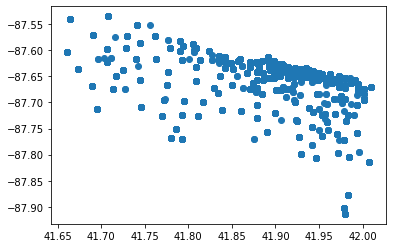

In [19]:
data = data.dropna()
data.describe()
plt.scatter(data["Pickup Centroid Latitude"], data["Pickup Centroid Longitude"])
plt

Doesnt look like there are any crazy outliers. I have removed all the null values, as those are dead values.

In [20]:
data = (data.sample(n = 50000)) # cutting down the datset as it is too large to run
data

,Pickup Centroid Latitude,Pickup Centroid Longitude
234375,41.980264,-87.913625
210518,41.884987,-87.620993
59887,41.901207,-87.676356
159870,41.892508,-87.626215
269749,41.895033,-87.619711
...,...,...
248751,41.884987,-87.620993
290484,41.893216,-87.637844
228398,42.009623,-87.670167
174305,41.892508,-87.626215


0.7321369647979736


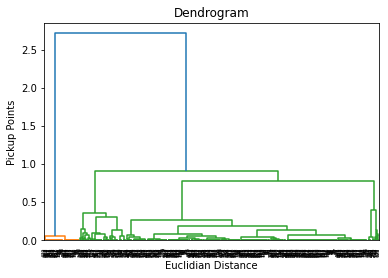

In [21]:
import scipy.cluster.hierarchy as sch
import time

start_time = time.time()

dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))

end_time = time.time()

run_time = end_time - start_time

print(run_time)

plt.title('Dendrogram')
plt.xlabel('Euclidian Distance')
plt.ylabel('Pickup Points')
plt.show()


I chose the Heirarchichal algorithm to clustering for this problem, as when I graphed the coordintes for the pickup, they all seem to group to getheri one area in the top right corner. This means there wont be too many different clusters present. For the the Heirarchichal algorithm works really well as it creates clusters as it goes, and its main limitation is data that is very spread out, causing it to create many clusters, which slows it down significantly.

I measured the performance of this algorithm by timing how long it ran, as well as utilizing jupyters current memory usage counter. The perfomance of the algorith,=m was similar to what I expected, since it goes through every data point multiple times, the run time is quite slow, but the space usage is low, due to the fact that there were not too many clusters created.

In [57]:
data = pd.read_csv("finnish_location_data.csv")
data

,latitude,longitude
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


<module 'matplotlib.pyplot' from '/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/pyplot.py'>

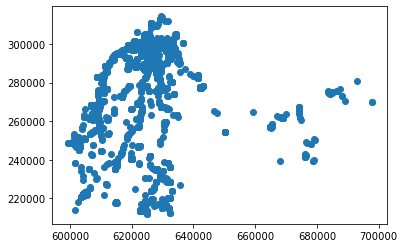

In [24]:
plt.scatter(data["latitude"], data["longitude"])
plt

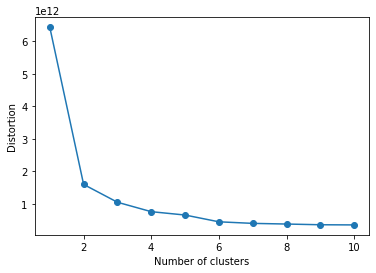

In [25]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(data)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

0.5730421543121338


<module 'matplotlib.pyplot' from '/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/pyplot.py'>

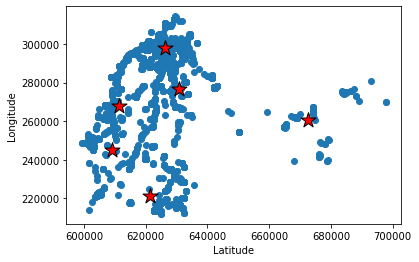

In [28]:
start_time = time.time()

Kmeans = KMeans(n_clusters=6, max_iter=600, algorithm = 'auto')

km = Kmeans.fit_predict(data)

end_time = time.time()

run_time = end_time - start_time

print(run_time)

plt.scatter(data["latitude"], data["longitude"])

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt

For the Finnish dataset, I chose kmeans as I wanted to try and utilize the elbow method to determine the best # of centroids. Also, Kmeans is a relatively efficient algorithm, the utilizes a moderate amount of space. I measuerd the algorithms performance by runtime and memory usage.

#Running the comparison between scikit K-Means and My K-Means

In [66]:
data = pd.read_csv("historical-weather.csv")
data

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,100,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,200,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4
3,300,2011-09-10 05:00:49,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2
4,400,2011-09-10 06:40:49,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.0,0.0,89.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,1586800,2014-09-10 16:23:29,914.3,77.18,225.0,5.2,238.0,6.0,214.0,4.4,0.0,0.0,43.2
15869,1586900,2014-09-10 18:03:29,914.4,77.00,190.0,1.5,196.0,1.7,185.0,1.4,0.0,0.0,42.8
15870,1587000,2014-09-10 19:43:29,914.9,75.92,344.0,0.4,352.0,0.6,336.0,0.3,0.0,0.0,43.9
15871,1587100,2014-09-10 21:23:29,915.7,75.38,13.0,1.5,24.0,1.7,4.0,1.2,0.0,0.0,46.7


In [67]:
data.corr()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
rowID,1.000000,-0.055187,0.161720,0.034375,-0.033324,0.034986,-0.035930,0.024965,-0.032722,-0.021604,-0.031339,-0.028147
air_pressure,-0.055187,1.000000,0.046296,-0.197714,-0.077352,-0.217877,-0.060287,-0.142218,-0.094720,-0.080481,-0.112794,-0.375241
air_temp,0.161720,0.046296,1.000000,-0.014719,-0.209340,-0.046445,-0.209983,0.025727,-0.201580,-0.059231,-0.113693,-0.620038
avg_wind_direction,0.034375,-0.197714,-0.014719,1.000000,-0.027794,0.715839,-0.028626,0.621677,-0.031545,0.015005,0.025888,0.206526
avg_wind_speed,-0.033324,-0.077352,-0.209340,-0.027794,1.000000,0.022464,0.985016,-0.114903,0.971058,0.089419,0.091910,0.059483
max_wind_direction,0.034986,-0.217877,-0.046445,0.715839,0.022464,1.000000,0.021483,0.421736,0.015318,0.018410,0.036116,0.239168
max_wind_speed,-0.035930,-0.060287,-0.209983,-0.028626,0.985016,0.021483,1.000000,-0.110048,0.926046,0.088740,0.097858,0.047763
min_wind_direction,0.024965,-0.142218,0.025727,0.621677,-0.114903,0.421736,-0.110048,1.000000,-0.118068,0.004749,0.007557,0.133838
min_wind_speed,-0.032722,-0.094720,-0.201580,-0.031545,0.971058,0.015318,0.926046,-0.118068,1.000000,0.076147,0.074413,0.071531
rain_accumulation,-0.021604,-0.080481,-0.059231,0.015005,0.089419,0.018410,0.088740,0.004749,0.076147,1.000000,0.553623,0.067226


In [68]:
data = data.loc[:, "max_wind_speed" : "min_wind_speed" : 2]
data = data.dropna()
data.to_numpy()

array([[1.6, 1. ],
       [2.5, 1.9],
       [0.5, 0.2],
       ...,
       [0.6, 0.3],
       [1.7, 1.2],
       [1.1, 0.7]])

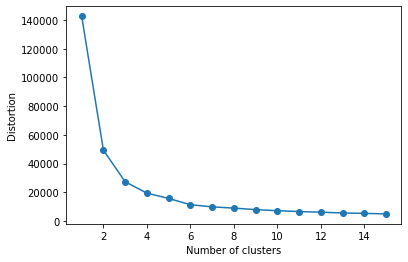

In [69]:
distortions = []
for i in range(1, 16):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(data)
    distortions.append(km.inertia_)

plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

0.21144509315490723


<module 'matplotlib.pyplot' from '/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/pyplot.py'>

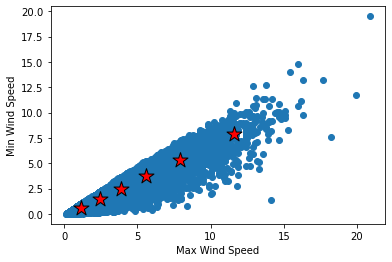

In [48]:
start_time = time.time()

Kmeans = KMeans(n_clusters=6, max_iter=600, algorithm = 'auto')

km = Kmeans.fit_predict(data)

end_time = time.time()

run_time = end_time - start_time

print(run_time)

plt.scatter(data["max_wind_speed"], data["min_wind_speed"])

plt.scatter(kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.xlabel("Max Wind Speed")
plt.ylabel("Min Wind Speed")
plt

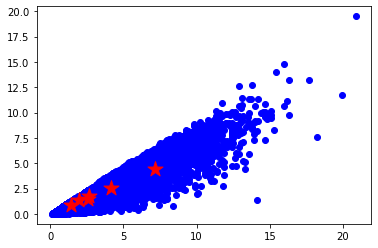

In [72]:
Z = kmeans(6, 600)
X_data = data.to_numpy()
datafr, cent = Z.fit(data.to_numpy())
graph_X = []
graph_Y = []



for i in range(len(X_data)):
    graph_X.append(X_data[i][0])
    graph_Y.append(X_data[i][1])
    

plt.scatter(graph_X, graph_Y, color = "blue")


graph_X = []
graph_Y = []

for i in cent:
    graph_X.append(i[0])
    graph_Y.append(i[1])

plt.scatter(graph_X, graph_Y, marker='*', c='red', s=250)

There are slight differences between my implementation of kmeans and the scikit implementation. The scikit seems to have the centroids cover more area than mine, meaning they are a better representation of a true centroid, where each covers as many points as possible, whilst mine can have only a few points covered. My implementation also took much longer to run, possibly due to having to check every single point through every iteration of convergence, which may not be done in the scikit learns implementation.